<a href="https://colab.research.google.com/github/jeramiah713/Complete-Python-3-Bootcamp/blob/master/final_ug_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import shutil
import os
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
training = "/content/drive/MyDrive/data_satellite/training"
validation = "/content/drive/MyDrive/data_satellite/validation"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    print(TRAINING_DIR, VALIDATION_DIR)
    train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=180,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range = 0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      class_mode='categorical',
                                                      target_size=(100, 100))

    validation_datagen = ImageDataGenerator(rescale=1./255)

    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                class_mode='categorical',
                                                                target_size=(100, 100))
    return train_generator, validation_generator

/content/drive/MyDrive/data_satellite/training /content/drive/MyDrive/data_satellite/validation
Found 5201 images belonging to 4 classes.
Found 698 images belonging to 4 classes.
(1, 32, 100, 100, 3)
(32, 100, 100, 3)


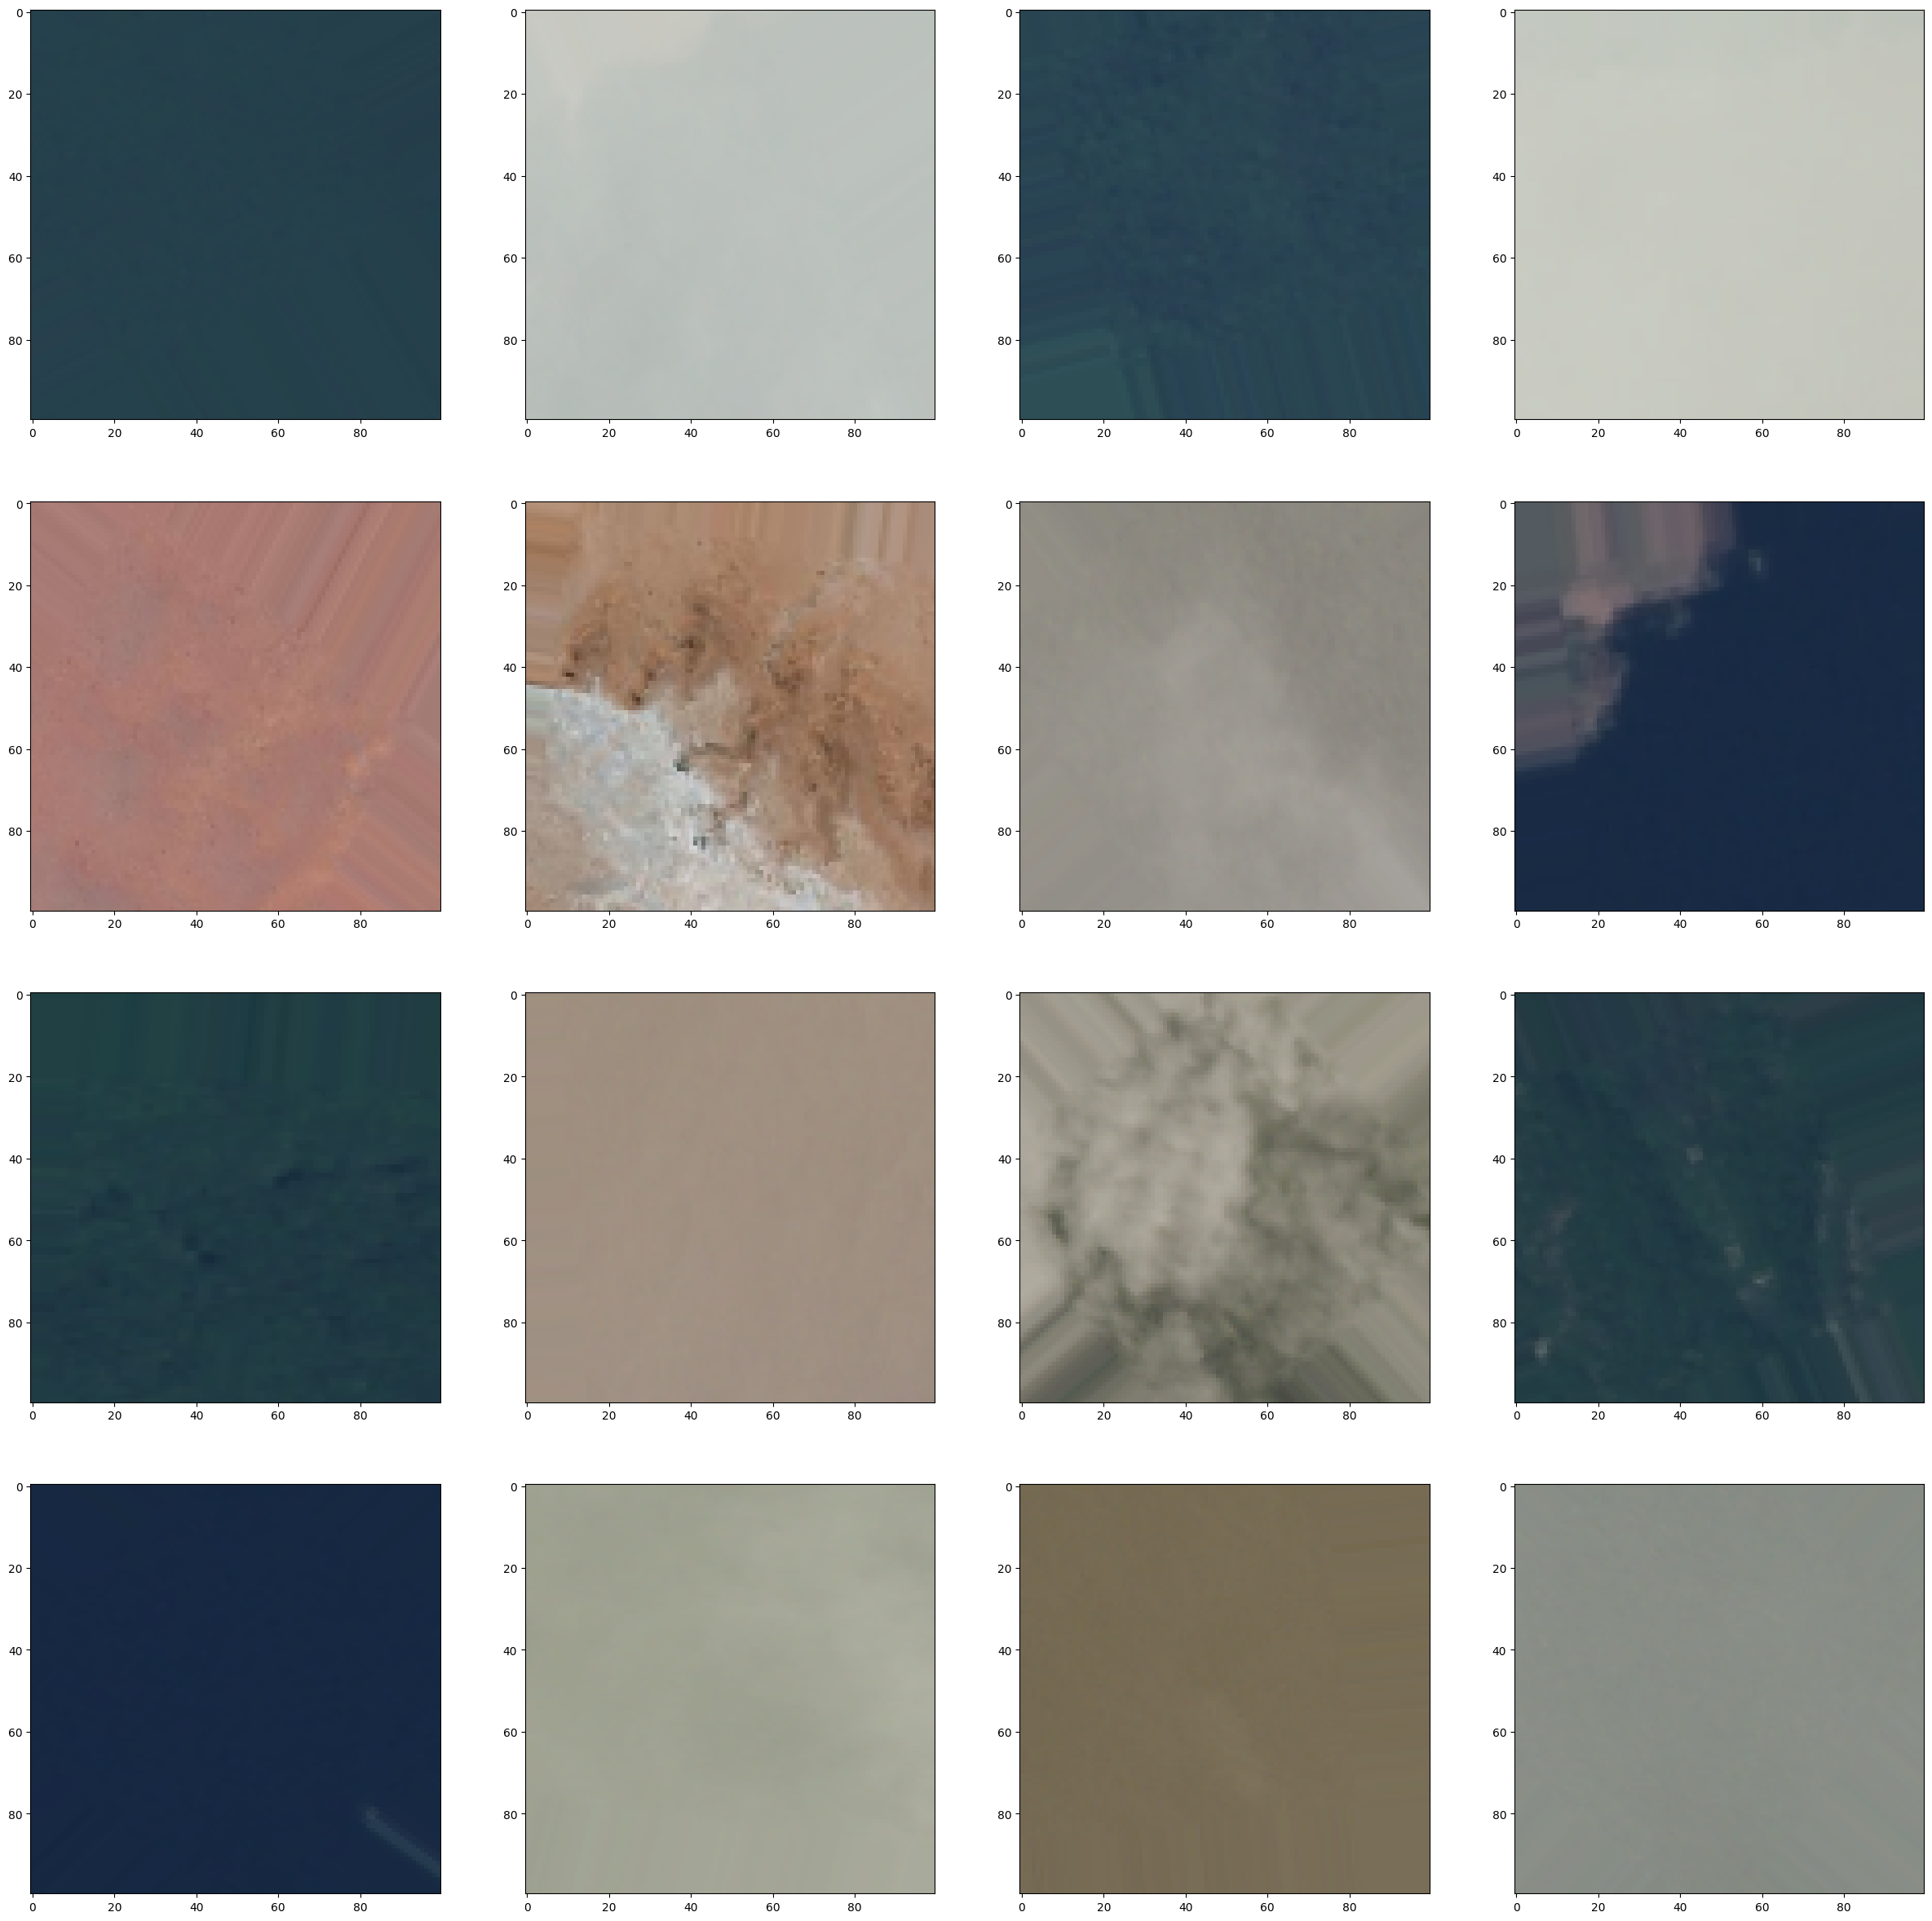

In [ ]:
train_generator, validation_generator = train_val_generators(training, validation)
x_train = []
y_train = []

c = 0
for feature, label in train_generator:
    x_train.append(np.array(feature))
    y_train.append(np.array(label))
    c += 1
    if c == 1:
        break

x_train = np.array(x_train)
print(x_train.shape)
x_train = np.reshape(x_train, (32, 100, 100, 3))
print(x_train.shape)

fig, ax = plt.subplots(4, 4, figsize=(30, 30))
for i in range(0, 16):
    ax[int(i / 4), (i % 4)].imshow(x_train[i])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def create_model():
    model = keras.models.Sequential([
      layers.Conv2D(32, (2,2), activation='relu', input_shape=(100, 100, 3)),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(64, (2,2), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      # Flatten the results to feed into a DNN
      layers.Flatten(),
      # 512 neuron hidden layer
        layers.Dropout(0.1),
      layers.Dense(512, activation='relu'),
        layers.Dropout(0.1),
      layers.Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model

model = create_model()

In [ ]:
history = model.fit(train_generator,
                    epochs=11,
                    verbose=1,
                    validation_data=validation_generator)

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

Epoch 1/11
163/163 [==============================] - 2633s 16s/step - loss: 0.5782 - accuracy: 0.6847 - val_loss: 0.3927 - val_accuracy: 0.7765
Epoch 2/11
163/163 [==============================] - 92s 560ms/step - loss: 0.4586 - accuracy: 0.7795 - val_loss: 0.3246 - val_accuracy: 0.8567
Epoch 3/11
163/163 [==============================] - 90s 550ms/step - loss: 0.3609 - accuracy: 0.8491 - val_loss: 0.3104 - val_accuracy: 0.8897
Epoch 4/11
163/163 [==============================] - 94s 579ms/step - loss: 0.3183 - accuracy: 0.8708 - val_loss: 0.2650 - val_accuracy: 0.9054
Epoch 5/11
163/163 [==============================] - 98s 602ms/step - loss: 0.2856 - accuracy: 0.8877 - val_loss: 0.2235 - val_accuracy: 0.9069
Epoch 6/11
163/163 [==============================] - 93s 568ms/step - loss: 0.3056 - accuracy: 0.8706 - val_loss: 0.2823 - val_accuracy: 0.8682
Epoch 7/11
163/163 [==============================] - 96s 591ms/step - loss: 0.2701 - accuracy: 0.8912 - val_loss: 0.2325 - val_ac

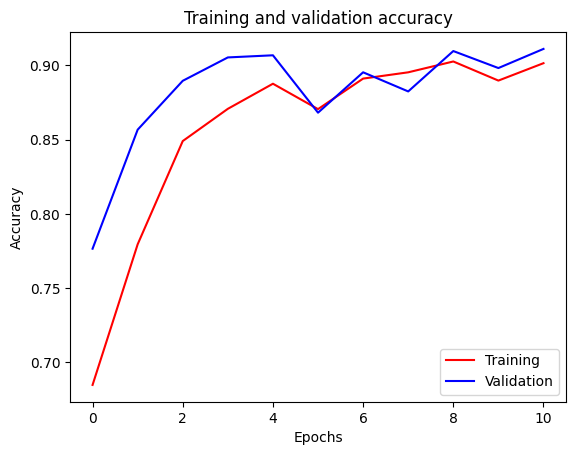

In [ ]:
 plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Training', 'Validation'])
plt.show()

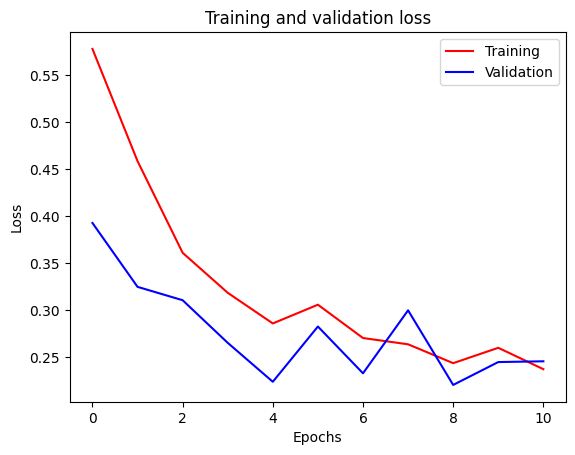

In [ ]:
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training', 'Validation'])
plt.show()